<a href="https://colab.research.google.com/github/official-okello/DS_bootcamp_with_gomycode/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Uses one independent variable X ro determine a dependent variable Y
#Assumes the relationship between the values can be represented by an lineequation Y = mX + b
#Y is the output to be determinedx, X is the input feature, m is the slope of the line, b is the intercept when x is 0

In [ ]:
#importing libs
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
#preparing the data
house_sizes = np.array([50, 75, 100, 125, 150]).reshape(-1, 1) #reshape to convert to 2D
house_prices = np.array([150000, 200000, 250000, 300000, 350000])

In [ ]:
#Training the Linear Regression Model
model = LinearRegression()
model.fit(house_sizes, house_prices)

LinearRegression()

In [ ]:
#Making Predictions
predicted_prices = model.predict(house_sizes)

In [ ]:
#Calculating the Difference Between Actual and Predicted Prices
differences = house_prices - predicted_prices
print('House Sizes:', house_sizes.flatten())
print('Actual Prices:', house_prices)
print('Predicted Prices:', predicted_prices.flatten())
print(f'Differences between Actual and Predicted Prices: {differences}')

House Sizes: [ 50  75 100 125 150]
Actual Prices: [150000 200000 250000 300000 350000]
Predicted Prices: [150000. 200000. 250000. 300000. 350000.]
Differences between Actual and Predicted Prices: [-2.91038305e-11 -2.91038305e-11  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


MORE ON LINEAR REGRESSION

Diabetes Dataset from scikitlearn

In [1]:
#import library to load diabetes dataset
from sklearn.datasets import load_diabetes

In [10]:
#load dataset
diabetes = load_diabetes()

In [15]:
#create X and Y data matrices
X = diabetes.data
Y = diabetes.target

# X, Y = load_diabetes(return_X_y=True)

In [37]:
#data split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# X_train.shape, X_test.shape

In [38]:
#build linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [39]:
#predict results
Y_pred = model.predict(X_test)

In [40]:
#check model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.34560453985995
Mean Squared Error: 2900.193628493482
R-squared: 0.4526027629719195


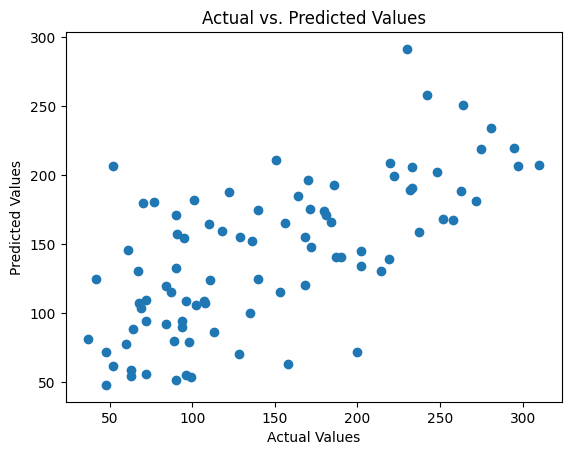

In [41]:
#scatterplot
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

<Axes: >

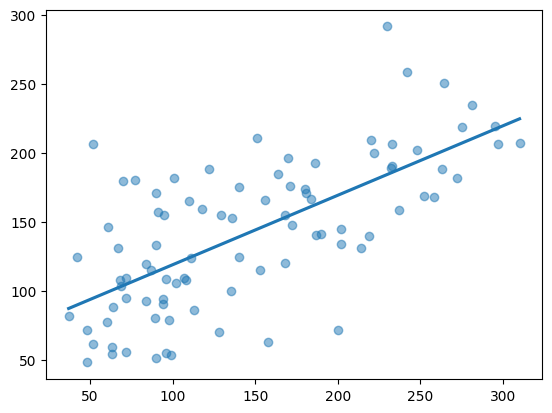

In [42]:
import seaborn as sns
sns.regplot(x=Y_test, y=Y_pred, ci=None, scatter_kws={'alpha': 0.5, 'marker': '+'})

Boston Housing Dataset

In [44]:
#download csv from GitHub
!wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2025-03-27 17:07:18--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2025-03-27 17:07:18--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.01s   

2025-03-27 17:07:19 (3.47 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



In [48]:
#loading dataset
import pandas as pd
BostonHousing = pd.read_csv('/content/BostonHousing.csv')
BostonHousing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [70]:
#assign X and Y matrices
# X = BostonHousing[['medv']]
# Y = BostonHousing.drop(['medv'], axis=1)

X = BostonHousing.medv.values.reshape(-1, 1)
Y = BostonHousing.drop(['medv'], axis=1)

In [71]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [72]:
#train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [73]:
#predict
Y_pred = model.predict(X_test)

In [74]:
#check model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Coefficients: [[-3.61474185e-01]
 [ 7.67859311e-01]
 [-3.47641032e-01]
 [ 5.27968943e-03]
 [-5.24399697e-03]
 [ 5.40275515e-02]
 [-1.02059346e+00]
 [ 5.36940724e-02]
 [-3.56641669e-01]
 [-8.18732487e+00]
 [-1.17310635e-01]
 [ 3.33525446e+00]
 [-5.61097501e-01]]
Intercept: [ 1.18494834e+01 -5.93522447e+00  1.89100603e+01 -4.85764448e-02
  6.76029117e-01  5.08425014e+00  9.18224299e+01  2.58415627e+00
  1.74866298e+01  5.90674813e+02  2.09925928e+01  2.80246098e+02
  2.52484301e+01]
Mean Squared Error: 2496.1615448976654
R-squared: 0.21937916866338875


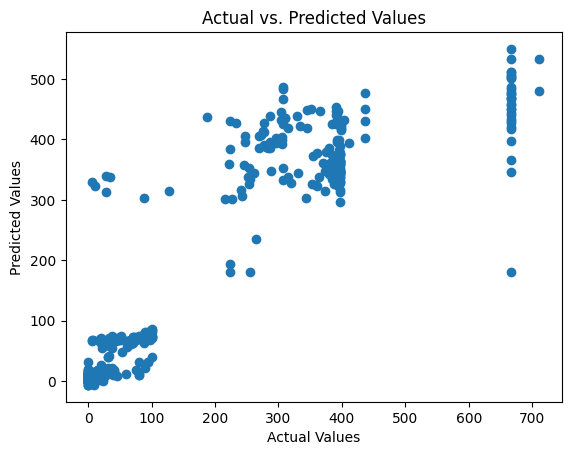

In [75]:
#plot
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()